In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("16-diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df["BMI"].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
49.6     1
24.1     1
41.2     1
49.3     1
46.3     1
Name: count, Length: 248, dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
columns_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = 100 * zero_count /len(df)
    print(f"{col}: {zero_count} %{zero_percentage:.2f}")

Glucose: 5 %0.65
BloodPressure: 35 %4.56
SkinThickness: 227 %29.56
Insulin: 374 %48.70
BMI: 11 %1.43


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


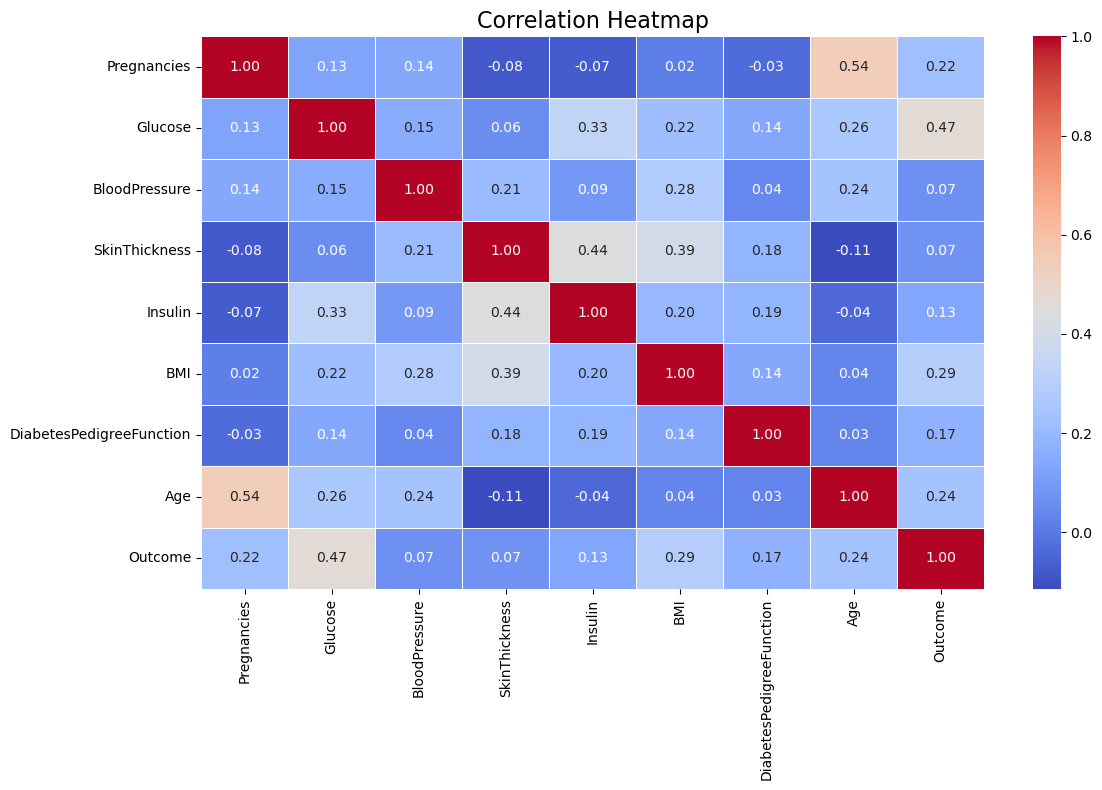

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

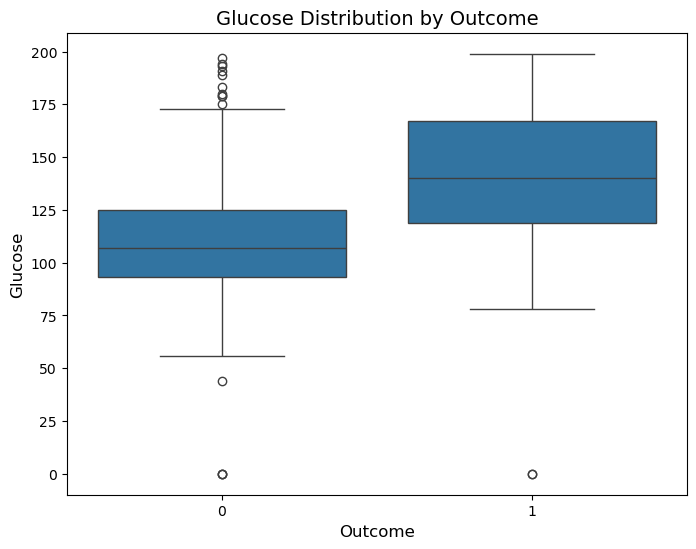

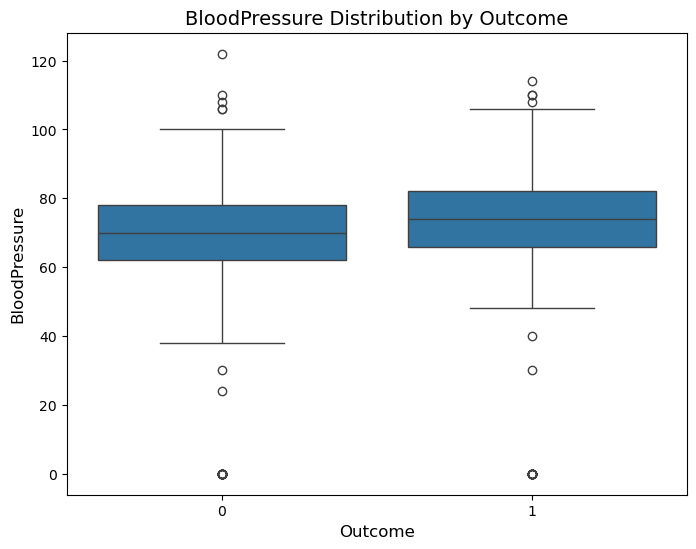

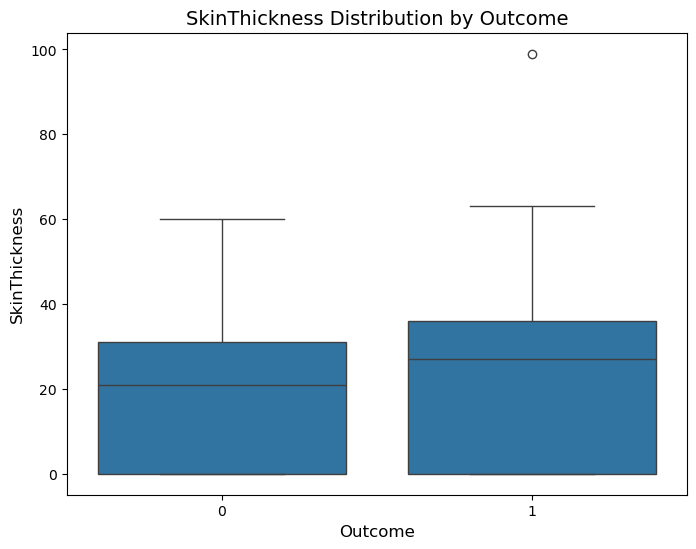

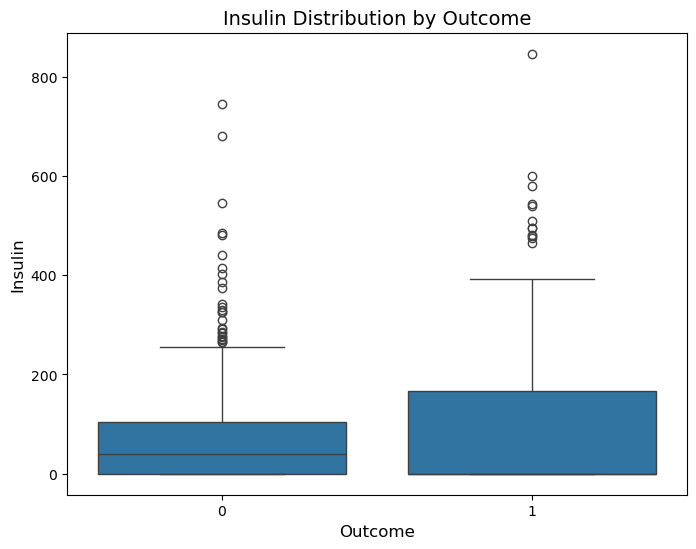

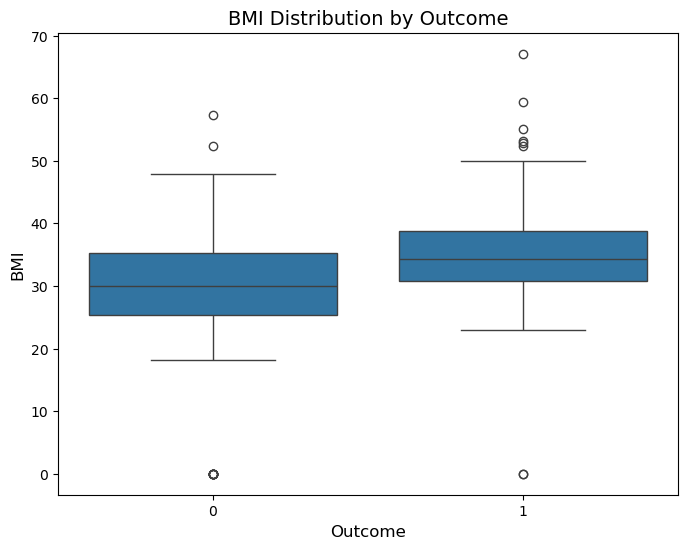

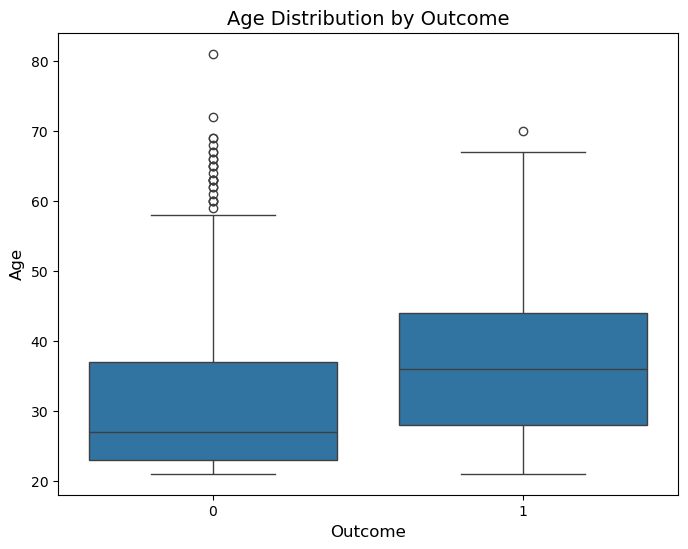

In [11]:
features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="Outcome", y=feature)
    plt.title(f"{feature} Distribution by Outcome", fontsize=14)
    plt.xlabel("Outcome", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()

In [12]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [14]:
columns_to_fill = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
medians={}
for col in columns_to_fill:
    median_value=X_train[X_train[col]!=0][col].median()
    medians[col]=median_value
    X_train[col]=X_train[col].replace(0,median_value)

for col in columns_to_fill:
    X_test[col]=X_test[col].replace(0,medians[col])


In [15]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,121.815961,72.229642,28.568404,138.115635,32.348208,0.469168,32.907166
std,3.313264,30.104012,12.099278,8.410029,88.650282,6.935618,0.336847,11.503437
min,0.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,24.000000,116.000000,27.325000,0.241500,24.000000
50%,3.000000,118.000000,72.000000,28.500000,120.000000,32.000000,0.372500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,129.750000,36.375000,0.613750,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "K-Neighbors Classifier": KNeighborsClassifier()
}

In [19]:
def evaluate_classification_models(models, X_train, y_train, X_test, y_test):
    
    for model_name, model in models.items():
        print(f"{model_name}")

        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred=model.predict(X_train)

        print(f"Model: {model_name}")
        print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))  
        print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
        print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

        print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))  
        print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
        print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

evaluate_classification_models(models, X_train, y_train,X_test,y_test)


Logistic Regression
Model: Logistic Regression
Test Accuracy:  0.7532467532467533
Test Confusion Matrix:
 [[82 17]
 [21 34]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Train Accuracy:  0.7719869706840391
Train Confusion Matrix:
 [[355  46]
 [ 94 119]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614

Naive Bayes
Model: Naive Bayes
Test Accuracy:  0.7597402597402597
Test Confusi

In [21]:
param_grids = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 1, 10],
        "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag"]
    },
    "Naive Bayes": {
        "var_smoothing": [1e-9, 1e-8, 1e-4]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [1, 3, 5, 9, 10],
        "min_samples_split": [2, 5, 10]
    },
    "SVC": {
        "C": [0.001, 0.01, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    },
    "K-Neighbors Classifier": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    }
}

def hyperparameter_tuning(X_train, y_train):
    best_models = {}
    
    for model_name, model in models.items():
        print(f"{model_name}")
        
        grid = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, verbose=1, n_jobs=-1)
        
        grid.fit(X_train, y_train)
        
        best_models[model_name] = grid.best_estimator_
        
        print(f"Best Parameters for {model_name}: {grid.best_params_}")
        print(f"Best Score for {model_name}: {grid.best_score_}")
        print("-" * 50)
    
    return best_models
    
best_models = hyperparameter_tuning(X_train, y_train)

Logistic Regression
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best Score for Logistic Regression: 0.7687724910035986
--------------------------------------------------
Naive Bayes
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Best Score for Naive Bayes: 0.7475543116086898
--------------------------------------------------
Decision Tree
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Score for Decision Tree: 0.7541383446621351
--------------------------------------------------
SVC
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVC: 0.765480474476876
--------------------------------------------------
K-Neighbors 

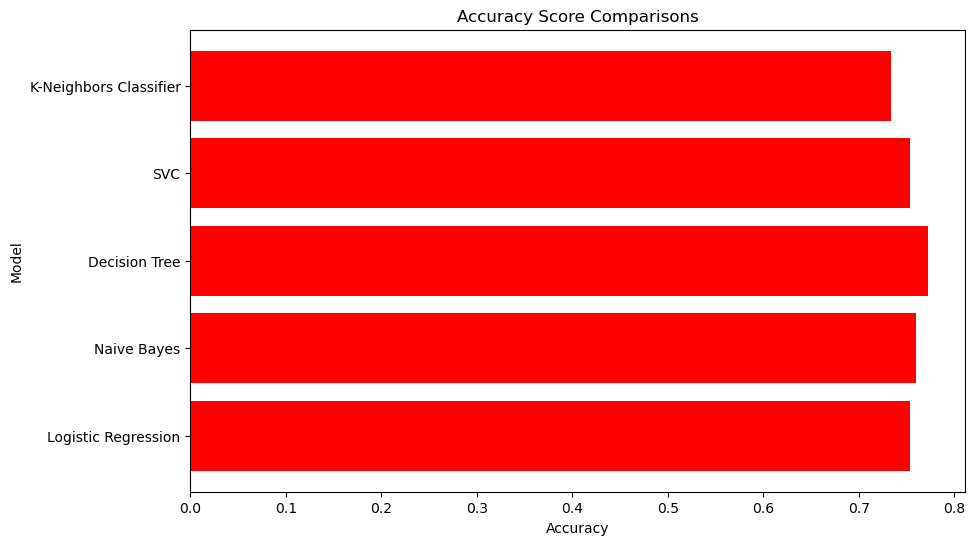

In [22]:
model_names = list(best_models.keys())
results = []

for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    results.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.barh(model_names, results, color='red')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Score Comparisons')
plt.show()
